In [70]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [71]:

mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [72]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [73]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # D

In [74]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [75]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screenQQQQ
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [76]:
draw_landmarks(frame, results)

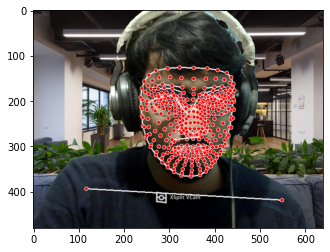

In [77]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [78]:
len(results.left_hand_landmarks.landmarks)

AttributeError: 'NoneType' object has no attribute 'landmarks'

In [79]:
results.pose_landmarks

landmark {
  x: 0.5369767
  y: 0.48926014
  z: -1.8786364
  visibility: 0.99970245
}
landmark {
  x: 0.57349586
  y: 0.3899738
  z: -1.8011634
  visibility: 0.99943155
}
landmark {
  x: 0.59670794
  y: 0.38788334
  z: -1.8012702
  visibility: 0.99948984
}
landmark {
  x: 0.61806667
  y: 0.38659558
  z: -1.8020092
  visibility: 0.99940646
}
landmark {
  x: 0.4874123
  y: 0.39308596
  z: -1.8294237
  visibility: 0.99941707
}
landmark {
  x: 0.45775557
  y: 0.3937611
  z: -1.8287449
  visibility: 0.99948424
}
landmark {
  x: 0.4341773
  y: 0.39676604
  z: -1.8292059
  visibility: 0.99941725
}
landmark {
  x: 0.6487602
  y: 0.41848296
  z: -1.1837306
  visibility: 0.9995109
}
landmark {
  x: 0.39191872
  y: 0.42957628
  z: -1.2777841
  visibility: 0.999634
}
landmark {
  x: 0.58171785
  y: 0.5818223
  z: -1.6282465
  visibility: 0.999735
}
landmark {
  x: 0.4786345
  y: 0.59496003
  z: -1.6569412
  visibility: 0.999759
}
landmark {
  x: 0.85803235
  y: 0.87179506
  z: -0.71948695
  visibil

In [80]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [81]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [82]:
len(results.face_landmarks.landmark)*3

1404

In [83]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()if results.face_landmarks else np.zeros(1404)

In [84]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [85]:
result_test = extract_keypoints(results)

In [86]:
result_test

array([ 0.5369767 ,  0.48926014, -1.87863636, ...,  0.        ,
        0.        ,  0.        ])

In [87]:
np.save('0',result_test)

In [88]:
np.load('0.npy')

array([ 0.5369767 ,  0.48926014, -1.87863636, ...,  0.        ,
        0.        ,  0.        ])

In [89]:
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello','Please smile', 'I love you'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [90]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [125]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                
                    
    cap.release()
    cv2.destroyAllWindows()

In [126]:
cap.release()
cv2.destroyAllWindows()

In [127]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [128]:
label_map = {label:num for num, label in enumerate(actions)}

In [129]:
label_map

{'Hello': 0, 'Please smile': 1, 'I love you': 2}

In [130]:
sequences, labels = [], []
for action in actions:
   for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [131]:
np.array(sequences).shape

(90, 30, 1662)

In [132]:
x=np.array(sequences)

In [133]:
x.shape

(90, 30, 1662)

In [134]:
y=to_categorical(labels).astype(int)

In [135]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.05)

In [136]:
ytest.shape

(5, 3)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [138]:
log_dir=os.path.join('logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [139]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [140]:
res = [.7, 0.2, 0.1]

In [141]:
actions[np.argmax(res)]

'Hello'

In [142]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [143]:
model.fit(xtrain, ytrain, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 4s 66ms/step - loss: 5.8670 - categorical_accuracy: 0.3765
Epoch 2/200
3/3 [==============================] - 0s 61ms/step - loss: 3.8345 - categorical_accuracy: 0.2824
Epoch 3/200
3/3 [==============================] - 0s 67ms/step - loss: 5.9436 - categorical_accuracy: 0.2353
Epoch 4/200
3/3 [==============================] - 0s 65ms/step - loss: 2.8012 - categorical_accuracy: 0.2824
Epoch 5/200
3/3 [==============================] - 0s 62ms/step - loss: 2.2965 - categorical_accuracy: 0.2353
Epoch 6/200
3/3 [==============================] - 0s 59ms/step - loss: 4.1081 - categorical_accuracy: 0.2824
Epoch 7/200
3/3 [==============================] - 0s 66ms/step - loss: 6.1841 - categorical_accuracy: 0.3647
Epoch 8/200
3/3 [==============================] - 0s 78ms/step - loss: 5.4873 - categorical_accuracy: 0.1294
Epoch 9/200
3/3 [==============================] - 0s 62ms/step - loss: 1.9704 - categorical_accuracy: 0.5765
Epoch 10/2

3/3 [==============================] - 0s 68ms/step - loss: 0.0492 - categorical_accuracy: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 61ms/step - loss: 0.0381 - categorical_accuracy: 0.9882
Epoch 76/200
3/3 [==============================] - 0s 59ms/step - loss: 0.0221 - categorical_accuracy: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 64ms/step - loss: 0.0172 - categorical_accuracy: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 71ms/step - loss: 0.0165 - categorical_accuracy: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 63ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 80/200
3/3 [==============================] - 0s 60ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 81/200
3/3 [==============================] - 0s 63ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 82/200
3/3 [==============================] - 0s 68ms/step - loss: 0.0095 - categorical_accuracy: 1.0000
Epoch 83/200
3

3/3 [==============================] - 0s 129ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 129ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 127ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 150/200
3/3 [==============================] - 0s 181ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 151/200
3/3 [==============================] - 0s 131ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 152/200
3/3 [==============================] - 0s 127ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 153/200
3/3 [==============================] - 0s 125ms/step - loss: 9.9022e-04 - categorical_accuracy: 1.0000
Epoch 154/200
3/3 [==============================] - 0s 121ms/step - loss: 9.7772e-04 - categorical_accuracy: 1.0000
Epoch 155/200
3/3 [==============================] - 0s 122ms/step - loss: 9.6566e-04 - categorical_ac

In [149]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [150]:
res = model.predict(xtest)

1/1 [==============================] - 0s 23ms/step


In [151]:
actions[np.argmax(res[4])]

'Please smile'

In [152]:
actions[np.argmax(ytest[4])]

'Please smile'

In [153]:
model.save('action.h5')

In [154]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [155]:
yhat = model.predict(xtest)

1/1 [==============================] - 0s 22ms/step


In [156]:
ytrue = np.argmax(ytest, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [157]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [158]:
accuracy_score(ytrue, yhat)

1.0

In [159]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [174]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        #cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        #cv2.putText(image, ' '.join(sentence), (3,30), 
                      #cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Nobel Bird', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] -

1/1 [==============================] - 0s 19ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Hello
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python

1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 20ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs

1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.Solutio

1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 15ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
I love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 15ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
Please smile
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===================

In [173]:
cap.release()
cv2.destroyAllWindows()

In [218]:
res[np.argmax(res)] > threshold

True

In [185]:
model.predict(np.expand_dims(xtest[0], axis=0))

1/1 [==============================] - 0s 16ms/step


array([[9.8670030e-01, 1.3298781e-02, 9.4959273e-07]], dtype=float32)

In [220]:
!pip install gTTS 

In [221]:
!pip install playsound  

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=eca9d91f83bd327ad3aa4f38bac0cc36ade0f969ae570493249f4f3252666810
  Stored in directory: c:\users\nobel\appdata\local\pip\cache\wheels\ba\39\54\c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound


In [231]:
!pip install pyttsx3  

In [258]:
from gtts import gTTS
  
# This module is imported so that we can 
# play the converted audio
import os
  
# The text that you want to convert to audio
mytext = 'i love you badhon'
  
# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=True)
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("welcome.mp3")
  
# Playing the converted file
os.system("welcome.mp3")

0

In [236]:
from playsound import playsound
playsound('welcome.mp3')


    Error 263 for command:
        open welcome.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close welcome.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: welcome.mp3


PlaysoundException: 
    Error 263 for command:
        open welcome.mp3
    The specified device is not open or is not recognized by MCI.

In [2]:
import pyttsx3
audio=pyttsx3.init()
audio.setProperty('rate',130)
audio.setProperty('volume',.9)
audio.say('Hello Badhon')
audio.say('I love you')
audio.runAndWait()